In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns
%matplotlib inline

# Logistic regression with tensorflow.

In this notebook we'll demonstrate logistic regression with tensorflow. We'll do a one dimensional example first, and then a higher dimensional example after that. Both examples are similar to training a [perceptron](https://en.wikipedia.org/wiki/Perceptron), except that the activation functions are sigmoids instead of the heaviside step function. 

## Logistic regression in one dimension

For the one dimensional example, we'll use a modified version of the [toy example](https://en.wikipedia.org/w/index.php?title=Logistic_regression&oldid=796806345#Example:_Probability_of_passing_an_exam_versus_hours_of_study) from wikipedia. This is equivalent to a single neuron with a sigmoid activation function $\varphi$, weight $w$, bias $b$ and input $x$. The output of the neuron is

$$ \varphi(Wx + b) = \frac{1}{1 + e^{-(Wx + b) }} $$

That is, we want to choose $w$ and $b$ such that the [sigmoid cross entropy](https://en.wikipedia.org/wiki/Cross-entropy_method) for our inputs $x$ and outputs $y$ are minimized. 



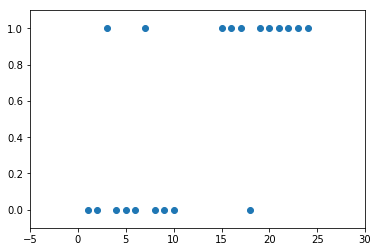

In [19]:
# Create some example points to fit the logistic equation to
df = pd.DataFrame()
df['x'] = [1,2,3,4,5,6,7,8,9,10,15,16,17,18,19,20,21,22,23,24]
df['y'] = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]

plt.scatter(df['x'], df['y']);
plt.axis([-5, 30, -0.1, 1.1]);

Final parameters: W=1.06142, b=-13.3761


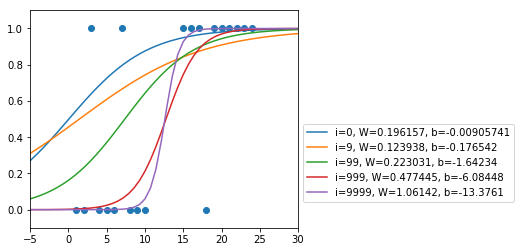

In [20]:
# Now we'll set up a model in tensorflow to do gradient descent and do it.

# Input placeholder. The input will be a 1 dimensional vector of unspecified length. One entry per x value.
x = tf.placeholder(tf.float32, [None, 1])

# Model parameters
W = tf.Variable(tf.zeros([1,1]))  # 1x1 weight matrix, since we only have one input and output
b = tf.Variable(tf.zeros([1]))     # 1 bias variable, since we only have one output. 

# Model
y = tf.sigmoid(tf.matmul(x, W) + b)

# Known correct answers. 1 dimensional vector of unspecified length with known y values.
y_ = tf.placeholder(tf.float32, [None,1])

cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
                    
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

# Do some boiler plate so we can log some steps during the gradient descent
fig = plt.figure()
ax = plt.subplot(111)
ax.axis([-5, 30, -0.1, 1.1])
x_fitted = np.linspace(-5,30)

# Do the gradient descent
for i in range(10000):
    sess.run(train_step, feed_dict={x: df['x'].values.reshape(-1,1), y_: df['y'].values.reshape(-1,1)})
    
    if math.log10(i+1) % 1 == 0:
        # Add the current solution to our plot every so often.
        W_curr = sess.run(W)[0][0]
        b_curr = sess.run(b)[0]

        y_fitted = 1/(np.array(list(map(math.exp,-W_curr*x_fitted - b_curr))) + 1)

        ax.plot(x_fitted, y_fitted, label="i=" + str(i) + ", W=" + str(W_curr) + ", b=" + str(b_curr))

# More plot related boilerplate
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.3))
plt.scatter(df['x'], df['y']);
   
# Final parameters
W_final = float(sess.run(W)[0][0])
b_final = float(sess.run(b)[0])

print("Final parameters: W=" + str(W_curr) + ", b=" + str(b_curr))

## Logistic regression in two dimensions

Now we will do logistic regression in two dimensions. The approach is very similar. We will construct a training set with the sepal_width and sepal_length of the setosa and virginica points from the well known 'iris' dataset, found in e.g. scikit-learn and seaborn's example corpus. 

Again, we will have a single neuron, but now it will have two inputs, $x_0 = \textrm{sepal_width}$ and $x_1 = \textrm{sepal_length}$. There will now be two weights, $w_0$ and $w_1$, and two biases, $b_0$ and $b_1$ The activation function will still be a sigmoid $\varphi$. The output of the neuron is now

$$ \varphi(Wx + b) = \frac{1}{1 + e^{-(Wx + b)}} $$ 

where $W = \begin{pmatrix} w_0 & w_1 \end{pmatrix}$, $b = \begin{pmatrix} b_0 \\ b_1 \end{pmatrix}$ and  $x = \begin{pmatrix} x_0 \\ x_1 \end{pmatrix}$.Now we wish to choose $W$ and $b$ to minimize the sigmoid cross entropy. 


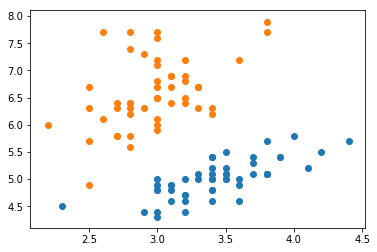

In [28]:
# Let's load and plot the data set.
df = sns.load_dataset("iris")
setosa = df.query("species == 'setosa'")
virginica = df.query("species == 'virginica'")

plt.scatter(setosa['sepal_width'],setosa['sepal_length']);
plt.scatter(virginica['sepal_width'],virginica['sepal_length']);